In [1]:
import torch
from toep_mlmm import Toep_Grid1D
from toep_mlmm import Toep_MLMM1D
from dd_mlmm import DD_MLMM1D

import matplotlib.pyplot as plt 
from ops import interp1d
from utils import rl2_error
from utils import kfunc_2D, ffunc_1D
from utils import kfunc_1D

In [2]:
n = 13
m = 31
k = 5
# device = torch.device('cuda:0')
device = torch.device('cpu')

In [3]:
toep_mlmm1d = Toep_MLMM1D(n, m, k, device)
dd_mlmm1d = DD_MLMM1D(n, m, k, device)

In [4]:
finest_grid = dd_mlmm1d.ml_grids[0]
nh = finest_grid.nh
hh = finest_grid.hh
finest_grid.init_grid_hh()
finest_pts = finest_grid.x_hh.reshape(-1,2)
Khh = kfunc_2D(finest_pts).reshape(nh, nh)

In [5]:
toep_mlmm1d.eval_ml_K(kfunc_1D)
toep_mlmm1d.assemble_K()

In [6]:
K_ref = kfunc_1D(toep_mlmm1d.ml_grids[0].x_h).T
fh = ffunc_1D(toep_mlmm1d.ml_grids[1].x_h).T
fh = fh.repeat(16,1)

In [7]:
uh = (hh * (Khh @ fh.T)).cpu()

In [8]:
uh_ = toep_mlmm1d.fft_kint(fh).T

In [12]:
rl2_error(uh_[:,0]*toep_mlmm1d.ml_grids[0].h, uh[:,0])

tensor(0.2188)

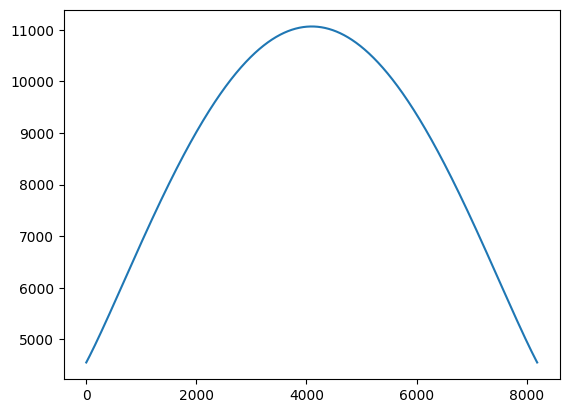

In [13]:
plt.plot(uh_[:,0])

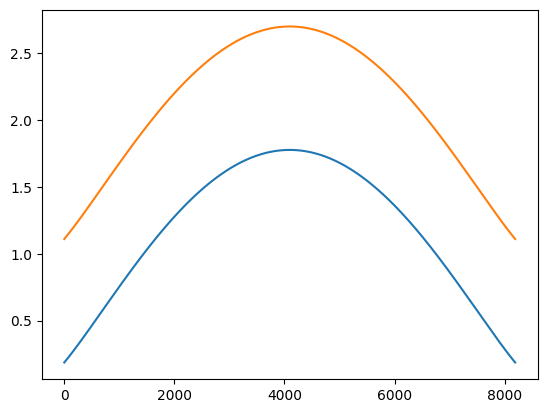

In [14]:
plt.plot(uh[:,0])
plt.plot(uh_[:,0]*toep_mlmm1d.ml_grids[0].h)

In [13]:
(K_ref.shape[0]-1)//2

8192

In [6]:
# plt.scatter(toep_mlmm1d.coarest_pts, toep_mlmm1d.K_H)
# for i in range(k):
#     plt.scatter(toep_mlmm1d.local_pts[i], toep_mlmm1d.K_locals[i])
# # plt.xlim([-0.0125, 0.0125])